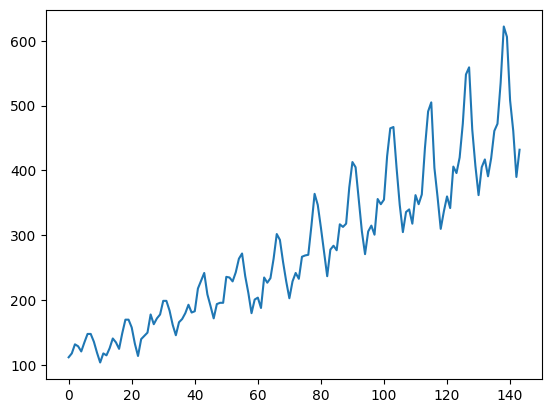

In [10]:
#Perform practical based on LSTM and GRU
#predicting passenger number for airline using past data
#using keras

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

#for getting datafile from internet
# import kagglehub
# path = kagglehub.dataset_download("iamsouravbanerjee/airline-dataset")
# print("Path to dataset files:", path)


In [6]:
#dataset preparation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


tf.random.set_seed(7)
dataset = dataset.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(94, 1)
(94,)
(46, 1)
(46,)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 22ms/step - loss: 0.0502
Epoch 2/50
94/94 - 0s - 3ms/step - loss: 0.0278
Epoch 3/50
94/94 - 0s - 3ms/step - loss: 0.0198
Epoch 4/50
94/94 - 0s - 3ms/step - loss: 0.0176
Epoch 5/50
94/94 - 0s - 3ms/step - loss: 0.0167
Epoch 6/50
94/94 - 0s - 3ms/step - loss: 0.0159
Epoch 7/50
94/94 - 0s - 3ms/step - loss: 0.0151
Epoch 8/50
94/94 - 0s - 3ms/step - loss: 0.0143
Epoch 9/50
94/94 - 0s - 3ms/step - loss: 0.0134
Epoch 10/50
94/94 - 0s - 3ms/step - loss: 0.0125
Epoch 11/50
94/94 - 0s - 3ms/step - loss: 0.0115
Epoch 12/50
94/94 - 0s - 3ms/step - loss: 0.0105
Epoch 13/50
94/94 - 0s - 3ms/step - loss: 0.0095
Epoch 14/50
94/94 - 0s - 3ms/step - loss: 0.0085
Epoch 15/50
94/94 - 0s - 3ms/step - loss: 0.0074
Epoch 16/50
94/94 - 0s - 3ms/step - loss: 0.0063
Epoch 17/50
94/94 - 0s - 3ms/step - loss: 0.0053
Epoch 18/50
94/94 - 0s - 3ms/step - loss: 0.0044
Epoch 19/50
94/94 - 0s - 3ms/step - loss: 0.0037
Epoch 20/50
94/94 - 0s - 4ms/step - loss: 0.0031
Epoch 21/50
94/94 - 0s - 3ms/step - los

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Train Score: 22.79 RMSE
Test Score: 49.35 RMSE


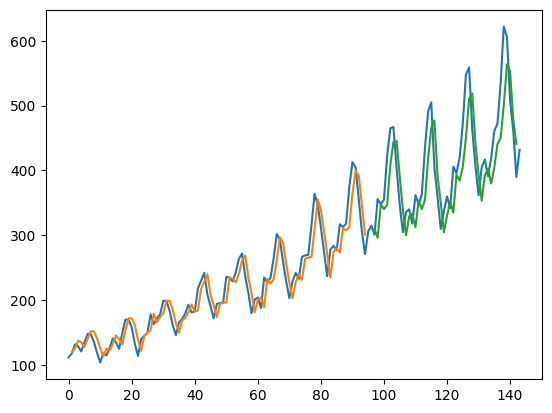

In [ ]:




look_back = 1
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [8]:
print(trainY)

[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
 0.08494207 0.06177607 0.02895753 0.         0.02702703 0.02123553
 0.04247104 0.07142857 0.05984557 0.04054055 0.08687258 0.12741312
 0.12741312 0.10424709 0.05598456 0.01930502 0.06949806 0.07915059
 0.08880308 0.14285713 0.11389962 0.13127413 0.14285713 0.18339768
 0.18339768 0.15444016 0.11196911 0.08108109 0.1196911  0.12934363
 0.14671814 0.17181468 0.14864865 0.15250966 0.22007722 0.24324325
 0.26640925 0.2027027  0.16795367 0.13127413 0.17374519 0.17760617
 0.17760617 0.25482625 0.25289574 0.24131274 0.26833975 0.3088803
 0.32432434 0.25675675 0.20656371 0.14671814 0.18725869 0.19305018
 0.16216215 0.25289574 0.23745173 0.25096524 0.3088803  0.38223937
 0.36486486 0.2992278  0.24131274 0.1911197  0.24131274 0.26640925
 0.24903473 0.31467178 0.3185328  0.32046333 0.4073359  0.5019305
 0.46911195 0.40154442 0.32818535 0.25675675 0.3359073  0.34749034
 0.33397684 0.41119692 0.4034749  0.4131274  0.52123547 0.596525

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/50], Loss: 0.1745
Epoch [20/50], Loss: 0.1608
Epoch [30/50], Loss: 0.1479
Epoch [40/50], Loss: 0.1357
Epoch [50/50], Loss: 0.1242


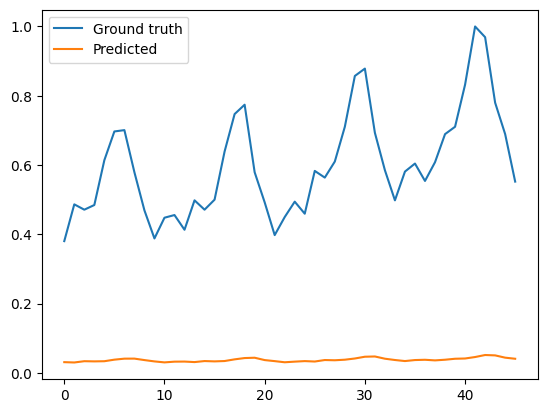

In [ ]:
#Implementing GRU
#using pytorch


import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

step_size = 1
N = 140
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX_tens = torch.tensor(trainX, dtype=torch.float32)
trainY_tens = torch.tensor(trainY, dtype=torch.float32)
testX_tens = torch.tensor(testX, dtype=torch.float32)
testY_tens = torch.tensor(testY, dtype=torch.float32)
train_dataset = torch.utils.data.TensorDataset(trainX_tens, trainY_tens)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
input_size = step_size
hidden_size = 128
output_size = 1
epochs = 50
learning_rate = 0.0001
model = GRUModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    model.train()
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_Y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    model.eval()
    testPredict = model(testX_tens)

# Plot results
index = range(len(testY))
plt.plot(index, testY, label="Ground truth")
plt.plot(index, testPredict.numpy(), label="Predicted")
plt.legend()
plt.show()
